## Análisis para tienda online ICE 

### Descripción.

En este proyecto se realizará un para la tienda online de venta de videojuegos, Ice que vende videojuegos por todo el mundo. Esto se realizará a través de un Dataset en formato .csv que contiene as reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos, los cuales están disponibles en fuentes abiertas. 
El objetivo es que identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá a la empresa detectar proyectos prometedores y planificar campañas publicitarias.

Los datos del archivo csv son del año a 2016, por lo que a efectos del proyecto se trabajará como proyecto para cierre de año (diciembre de 2016) con miras a planeación de la campaña publicitaria de 2017.

El dataset también contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Para este proyecto se buca identifacr y cubrir los siguientes parámetros:

a. Identificar y describir  problemas en los datos.

b. Preparar el Datset para el análisis mediante reemplazo o eliminación de valores ausentes según se requiera y crear columnas necesaria en el análsis.

c. Crear un perfil de usaurio en cad región que permita a la empresa determinar mejores estrategias según cada región. 

d. Crear gráficas distrubución para faciltar la visualización de los datos. 

e. Realizar cálculos estadístios necesarios para redactar y probar hipótesis que sean relevantes para el negocio. 

f. Conclusiones del proyecto. 


**Índice**   

1. Importación de librerías
2. Lectura del csv
3. Información general del Dataset
4. Preprocesamiento de datos
5. Análisis exploratorio de datos
6. Visualización estadística
7. Creación de perfil de usaurio ideal por región
8. Hipótesis
9. Conclusiones



### 1. Importación de librerías

Como primer paso, importaremos las librerías de python necesarias para realizar el proyecto estas son: 

- Pandas para preprocesamiento y análsis de datos.
- Numpy para preprocesamiento y análsis de datos.
- Scipy para anáslisis estadístico. 
- Matplotlib para visualización de gráficas.

In [1]:
#Importamos las librerias pandas, numpy, scipy y matplotlib. 
import pandas as pd
import numpy  as np
from scipy import stats as st
import matplotlib.pyplot as plt

### 2. Lectura del csv

A continuación se carga el Dataset games.csv 

In [2]:
# Leer el csv 
games = pd.read_csv('/datasets/games.csv')

### 3. Información general del Dataset

Mostramos la infromación general del Dataset 

In [3]:
#Mostramos la información general medainte el método info()
games.info()
#Obtenenemos una muestra mediante el método sample()
games.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4758,Pengo,2600,1983.0,Adventure,0.38,0.02,0.00,0.00,NaN,NaN,NaN
11838,Margot's Word Brain,DS,2008.0,Puzzle,0.07,0.00,0.00,0.01,NaN,tbd,E10+
2749,Burnout,PS2,2001.0,Racing,0.36,0.28,0.00,0.10,79.0,7.7,E
2096,Littlest Pet Shop: Winter,DS,2008.0,Simulation,0.58,0.31,0.00,0.10,NaN,tbd,E
15173,RayCrisis: Series Termination,PS,1999.0,Shooter,0.01,0.01,0.00,0.00,67.0,tbd,E
9594,DT Racer,PS2,2005.0,Racing,0.06,0.05,0.00,0.02,NaN,3.8,E
13049,Cities in Motion,PC,2011.0,Simulation,0.00,0.04,0.00,0.01,70.0,7.7,E
9056,Jonny Moseley Mad Trix,PS2,2001.0,Sports,0.07,0.05,0.00,0.02,44.0,5.7,T
2933,Disney's Chicken Little,GBA,2005.0,Platform,0.50,0.18,0.00,0.01,71.0,tbd,E
8480,Dengeki Bunko Fighting Climax,PS3,2014.0,Fighting,0.05,0.00,0.09,0.01,66.0,8.2,T


#### 3.1 Hallazgos: 

Observamos datos ausentes en las columnas Name, Year_of_release, Genre, Critic_score, user_score y rating. 
En este caso vemos que solo hay dos datos ausentes en Name por lo que este se podría elimianr al no ser un número significativo. 
El problema se observa en los datos de critic-score y user-score, en donde vemos que hay varios datos ausentes, por lo que habría que revisar más adelante si estos datos corresponden a juegos de mercados exclusivos como se observa en el ejemplo, o bien deben ser reemplazados. 
De igual forma, se debe cambiar el nombre de las columnas a minusculas para facilitar el análisis, cambiar los datos de año de float a object, y user_score de object a float.

### 4. Preprocesamiento de datos

En esta parte del proyecto vamos a procesar los datos para que estos estén listos para el análisis, donde se realizará una exploración para conocer saber si se deberán cambiar los datos ausentes y duplicados, o eliminarlos así como cambiar los datos de las columnas a un dato adecuado cuando se requiera. Igualmente se creara una nueva columna de ventas totales la cual será de utilidad para la creación del perfil de usuario por región  más adelant en el proyecto.  


In [4]:
#Cambiamos el nombre de las columnas a minúsculas
games.columns = games.columns.str.lower()
#Mostramos información del Dataframe para confirmar cambios
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Determinamos número de valores ausentes en cada columna mediante info. 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Reemplazo o elimnación de valores ausentes 
#Eliminamos datos ausentes de name y year_of_release al no ser una cantidad significativa para el análisis 
games = games.query('name.isna() == False') #Eliminamos los datos mediante un filtrado


In [8]:
games = games.query('year_of_release.isna() == False') #Eliminamos los datos mediante un filtrado

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
#Revisamos valores ausentes en critic_score, user_score y rating
df_critic = games.query('critic_score.isna()') #creamos un dataframe para aplicar el filtrado 
print(df_critic) #Mostramos el df
df_user_score = games.query('user_score.isna()') #creamos un dataframe para aplicar el filtrado 
print(df_user_score) #Mostramos el df

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [11]:
#Reemplazamos la crítica con ceros. 
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
print(games.sample(20))

                                                    name platform  \
10926                                        Ribbit King      PS2   
12574                         Tokyo Xtreme Racer Advance      GBA   
2387                                  Monster Strike 3DS      3DS   
11699                                    Captain Tsubasa      PS2   
11104    World Championship Games: A Track & Field Event       DS   
15249                           Jojo's Bizarre Adventure       PS   
3196                                         Wolfenstein      PS3   
1993                                        Bomberman 64      N64   
10823                                             NASCAR      PSP   
1589       Gegege no Kitarou 2: Youkai Gundan no Chousen      NES   
5374                                           Frostbite     2600   
11850                                    Sigma Harmonics       DS   
10228                                              Alias      PS2   
484                               

Observamos un valor llamado 'tbd' el cual significa to be determined se revisan las columnas para ver que implican estos datos.

In [12]:
df_tbd = games.query("user_score == 'tbd'") #creamos un dataframe para aplicar el filtrado 
print(df_tbd.head()) #Mostramos el filtrado

                               name platform  year_of_release   genre  \
119                   Zumba Fitness      Wii           2010.0  Sports   
301  Namco Museum: 50th Anniversary      PS2           2005.0    Misc   
520                 Zumba Fitness 2      Wii           2011.0  Sports   
645                    uDraw Studio      Wii           2010.0    Misc   
718                 Just Dance Kids      Wii           2010.0    Misc   

     na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
119      3.45      2.59       0.0         0.66           0.0        tbd      E  
301      2.08      1.35       0.0         0.54          61.0        tbd   E10+  
520      1.51      1.03       0.0         0.27           0.0        tbd      T  
645      1.65      0.57       0.0         0.20          71.0        tbd      E  
718      1.52      0.54       0.0         0.18           0.0        tbd      E  


In [13]:
#Reemplazamos los valores tbd por ceros
games['critic_score'] = games['critic_score'].replace('tbd', 0)
games['user_score'] = games['user_score'].replace('tbd', 0)

In [14]:
#Corregimos los tipos de datos. 
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('float')
#Mostrams información del df
games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Los siguientes valores ausentes son rating, generamos una lista de los valores únicos para revisar cuales serían las posibles opciones de reemplazo al ser una variable categórica. 

In [15]:
#Reevisamos valores únicos
print(games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [16]:
#Reemplazamos ausentes con RP(Rated Pending)
games['rating']= games['rating'].fillna('RP')
#Revisamos resultados 
print(games['rating'].unique())

['E' 'RP' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC']


In [17]:
#Verificamos información del Dataset 
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [18]:
#Revisamos valores ausentes 
games.duplicated().sum()

0

In [19]:
#Revisamos valores unicos en platform y genre para verificar que no halla otros duplicados con variables categoricas que no se hallan considerado
print(games['platform'].unique())
print(games['genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [20]:
#Calculamos las ventas totales para cada área. 
total_sales = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print(total_sales)

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Length: 16444, dtype: float64


In [21]:
# Añadimos la columna al Dataframe
games['total_sales'] = total_sales
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


#### 4.1 Hallazgos: 
Observamos que no hay como tal un patrón en los años de valores ausentes, ya que podría suponerse que por ser videojuegos antiguos o muy nuevos, estos no cuentan con crítica. Lo cual no es el caso, lo que si vemos es que es cierto que o bien son juegos con muchos años como los casos de Super Mario Bros,
Pokemon Red/Pokemon Blue, Tetris o Duck Hunt, siendo plausible este hecho ya que no había sisitemas de criticas como en la actualidad, y el segundo caso, es de aquellos juegos poco populares en las plataformas, o bien que hallan tenido ventas exclusivas en cierta región ya que observamos que alguno solo se vendieron en Japón y tuvieron en realidad pocas ventas a comparación de otros títulos.

Observamos que los datos de tbd si bien no son de videojuegos antiguos, si tienen el común que no se han vendido en Japón o en otras regiones del mundo, lo que nos puede indicar que probablemente se de una puntuación de usuarios y crítica cuando se hallan generado ventas a nivel mundial, ya que las opiniones podrían no ser las mismas en Japón que en Europa o EUA, y esto generaría un desequilibrio en las mismas. 
Por ende para efectos del análisis se reemplazará con ceros. 

Para el caso del Rating al revisa la clasificación oficial de videojuegos dada por la ESRB, observamos que lo datos ausentes pueden deberse a la clasifcación RP o rated pending, es decir de aquellos a los que no se llega a un acuerdo sobre que edades son las más adecuadas para jugarlos, por ende se reemplazan los valores ausentes con esta clasificación. 

En el caso de los duplicados no se hallaron duplicados por análisis de método duplicated ni con búsqueda manual, si bien hay consolas que parecieran duplicados, estas son diferentes generaciones por lo que los juegos disponibles para cada una varian. 

Finalmente se añade la columna total_sales para que obtener mejor información sumando las ventas de cada región y obtener las ventas a nivel mundial. 

### 5. Análisis exploratorio de datos

Una vez tenemos los datos limpios y ordendos, a continuación se analizan los datos según las diferentes variables que pudieron afectar la venta de los videojuegos. 
Por ejemplo, el año de lanzamiento de lo juegos, plataformas y géneros más rentables. 

In [22]:
# Se observa cuántos juegos fueron lanzados en diferentes años para saber si son significativos los datos de cada periodo.
games_per_year = games.groupby('year_of_release')['name']
print(games_per_year.count().sort_values(ascending=False))

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64


In [23]:
# Se obtiene la variación de lanzamientos  según plataformas 
games_per_platform = games.groupby('platform')['name']
print(games_per_platform.count().sort_values(ascending=False))

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: name, dtype: int64


In [24]:
# Se obtiene la variación de ventas según plataformas 
sales_per_platform = games.groupby('platform')['total_sales']
print(sales_per_platform.sum().sort_values(ascending=False))


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


Observamos que los principales desarrolladores de consolas son Microsft (XBOX), Sony(Play Station) y Nintendo (Wii, GameBoy y DS), siendo aquellos con juegos más vendidos por lo que se agruparán las consolas por fabricantes, para hallar plataformas populares que ya no tengan ventas y ver si es posible determianr el ciclo de vida de cada consola.  

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77) Text(0.5, 1.0, 'Ventas Sony') Text(0.5, 0, 'Año de lanzamiento') Text(0, 0.5, 'Ventas')


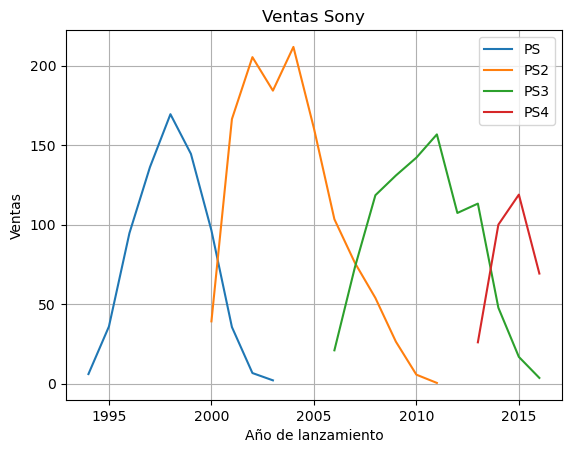

In [25]:
#Hacemos los calculos para plataformas de Sony
a = ['PS']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='PS'))

a = ['PS2']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='PS2'))

a = ['PS3']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='PS3'))

a = ['PS4']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='PS4',grid=True),
plt.title('Ventas Sony'),
plt.xlabel('Año de lanzamiento'),
plt.ylabel('Ventas'))

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77) Text(0.5, 1.0, 'Ventas Microsoft') Text(0.5, 0, 'Año de lanzamiento') Text(0, 0.5, 'Ventas')


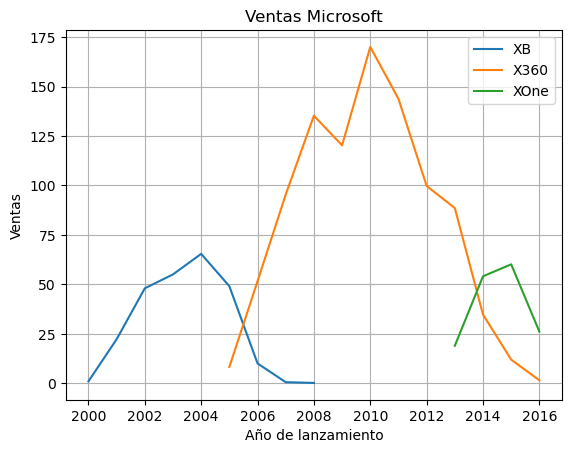

In [26]:
#Hacemos los calculos para plataformas de Microsoft
a = ['XB']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='XB'))

a = ['X360']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='X360'))

a = ['XOne']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='XOne', grid=True),
plt.title('Ventas Microsoft'),
plt.xlabel('Año de lanzamiento'),
plt.ylabel('Ventas'))






Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77) Text(0.5, 1.0, 'Ventas Nintendo') Text(0.5, 0, 'Año de lanzamiento') Text(0, 0.5, 'Ventas')


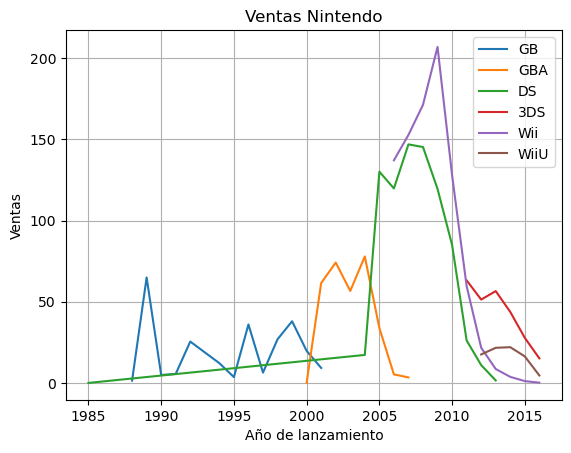

In [27]:
#Hacemos los calculos para plataformas de Nintendo
a = ['GB']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='GB'))

a = ['GBA']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='GBA'))

a = ['DS']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='DS'))

a = ['3DS']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='3DS'))

a = ['Wii']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='Wii'))

a = ['WiiU']
filter= games[games['platform'].isin(a)][['year_of_release','total_sales']]
sales=filter.groupby('year_of_release')['total_sales'].sum()
print(sales.plot(legend=True,label='WiiU', grid=True),
plt.title('Ventas Nintendo'),
plt.xlabel('Año de lanzamiento'),
plt.ylabel('Ventas'))

#### 5.1 Hallazgos 
En primer lugar observamos que la venta de videojuegos auemnta en cada década, siendo que se vendían apenas 9 millones en 1980, 
y a partir del año 2000 la cifra escaló a más de 300 millones, observamos un pico de ventas hasta 2008 donde se estabilizó la venta y para el año 2016 son aproximadamnte 500 millones.
Por esta razón en adealnte se trabajaran datos desde e año 2000 a la actualidad ignorando los años anteriores. 
Vemos que la plataforma con mayor ventas es Play Station 2 seguida de Xbox 360, Play Staion 3 y Wii. 
Siendo que las ventas de Play Station 2 corresponden a la cantidad de juegos disponibles ya que es la plataforma con más juegos. 
Por otro lado, Xbox 360, que se encuentra en el segundo lugar de ventas es la cuarta con más videojuegos lanzados, 
Siendo que las plataformas de Nintendo como Wii y nintendo DS, cuentan con más títulos pero se encuentran por debajo en los lugares 4 y 5 respectivamente. 
Igualmente la plataforma Play Station 3 es la tercera con más títulos lanzados, y la tercera en ventas.
Siendo que para futuros análisis se escogerá la Play Station 2  al ser la que tiene más ventas y catálogo de videojuegos. 
Por lo que la clasificación de las 5 plataformas líderes en ventas quedaría de la siguiente forma: 

Primer lugar: Play Station 2     
Segundo lugar: X-box 360     
Tercer lugar: Play Station 3      
Cuarto lugar: Wii      
Quinto lugar: Nintendo DS

En cuanto al ciclo de vida de las consolas, dentro del gráfico observamos un patrón similar en Microsoft y Sony. 
Donde para Sony, hay un ciclo de vida de alrededor de 10 años, siendo algunas plataformas más longevas que otras. 
Siendo que para la primer consola salió en 1994, tuvo su pico de ventas en 1997, comenzó a decaer hasta 2003 cuando salió del mercado,
pero se lanzó la siguiente generación en al año 2000 teniendo el pico de ventas en 2005, siendo la más longeva hasta 2011.
La siguiente se lanzó de 2006 hasta 2016 con pico de ventas en 2011 y la más reciente desde 2013.
En el caso de Microsoft tenemos que la primer consola salió en el año 2000 con un pico de ventas en 2004 saliendo del mercado en 2008. 
la segunda inició en 2005, son pico de ventas en 2010 y saliendo el año 2016. 
La más reciente saliendo en 2013. 
Observamos que el tiempo de vida de una consola es de entre 6 y 10 años y estas salen del mercado 3 años después del lanzamiento de su sucesor la cual se introduce al mercado entre 2 y 3 años despés del pico de ventas. 
El caso de Nintendo es más particular ya que observamos que la plataforma más longeva fue el Nintendo DS que duró desde 1985 hasta 2013. 
Con un pico de ventas en 2007, sería reemplazado por la 3DS la cual es lanzada en 2011 4 años despúes del pico de ventas. 
La plataforma Game Boy fue lanzada en 1987 y tuvo el pico de ventas en 1988 pero se retiró del mercado hasta el 2001 siendo reemplazda por la Game Boy Advance introducida en el 2000 y que tuvo pico de ventas en 2004 siendo retirad en 2007. 
Fianalmente tenemos la consola Wii introducida en el año 2006 con pico de ventas en 2009, y no siendo retirada para 2016, siendo que la WiiU fue introducida 1 años después de la 3DS en 2011 superando actualmente WiiU y 3DS las ventas de Wii y DS respectivamente. 
Si bien no tenemos un patrón tan marcado como en Micrsoft y Sony, vemso que Nintendo trata de alargar lo más posible la vida de las consolas pero igualemente retirandolas entre 2 y 3 años despúe de la llegada de su sucesora. 

### 6. Visualización estadística
 
En esta sección vamos a generar las visulizaciones gráficas necesarias para obtener más información sobre los datos, que nos permitirán obtener más información relevante. 
Para este caso, elegiremos aquellas plataformas que se hallan denominado como más rentables en el análisis anterior, primero generando un boxplot que nos indicará para las ventas globales de todos los juegos y analizar si exsiten diferencias significativas en las ventas por plataforma así como sus ventas promedio.
Posteriormente revisaremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular, mediante un diagrama de dispersión. 
Una vez hallado esto, se procederá comparar las ventas de los mismos juegos más o con mejor críitica en otras plataformas.
Finalmente, se revisará la distribución general de los juegos por género par determinar si esto afecta a las ventas. 





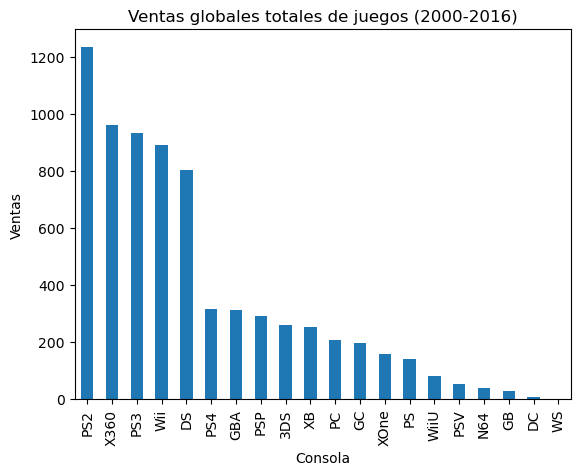

In [28]:
#Generar gráfica para ventas globales totales de juegos. 
#Primero aplicamos un filtro
filtered_year = games.query('year_of_release >1999 and year_of_release < 2017')
#Ordenamos el filtro por año de lanzamiento
filtered_year = filtered_year.sort_values(by='year_of_release').reset_index(drop=True)
#Obtenemos los valores totales por plataforma 
platform_sales = filtered_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#Generamos gráfica
platform_sales.plot(x='platform', y='total_sales', kind='bar'),
plt.title ('Ventas globales totales de juegos (2000-2016)'),
plt.xlabel('Consola'),
plt.ylabel('Ventas')
plt.show()


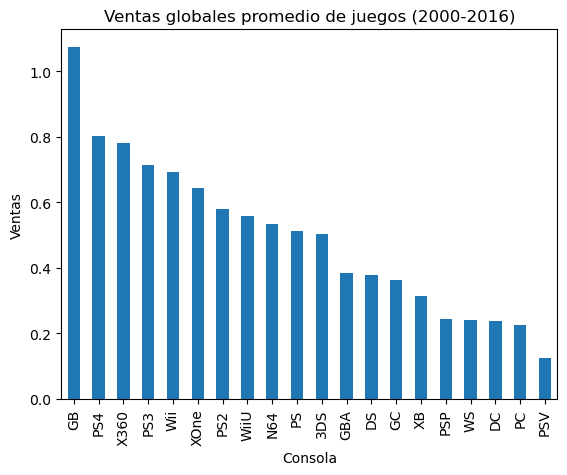

In [29]:
#Generar gráfica para ventas globales promedio de juegos. 
#Obtenemos los valores promedio por plataforma 
mean_sales = filtered_year.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
#Generamos gráfica 
mean_sales.plot(x='platform', y='total_sales', kind='bar', ),
plt.title ('Ventas globales promedio de juegos (2000-2016)'),
plt.xlabel('Consola'),
plt.ylabel('Ventas')
plt.show()


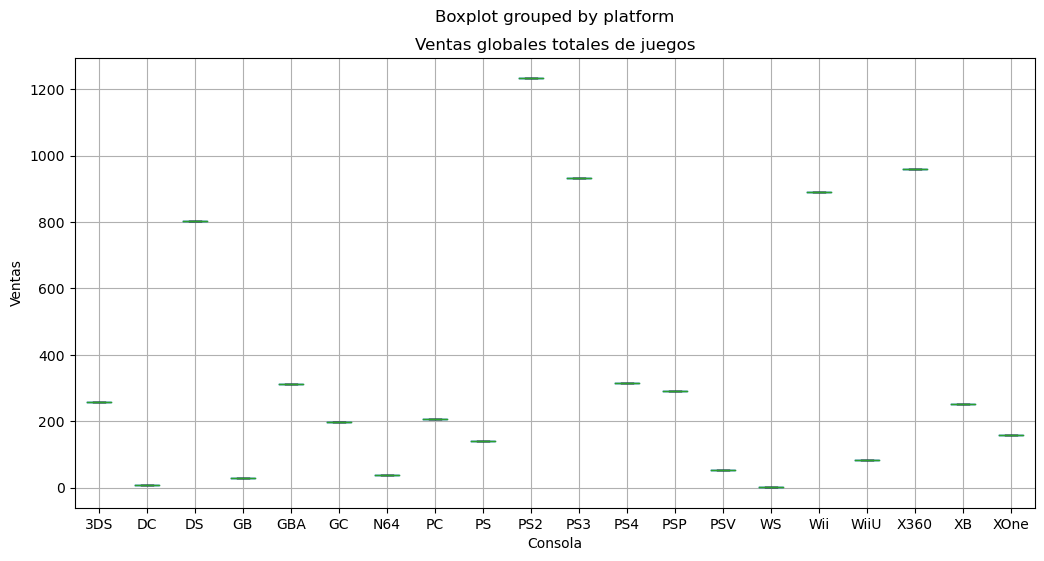

In [30]:
#Generar boxplot para ventas globales totales de juegos.
platform_sales2 = platform_sales.to_frame() #Convertimos a DataFrame para poder generar boxplot
#Generamos boxplot
platform_sales2.boxplot(column=['total_sales'], by='platform', figsize=(12,6)),
plt.title('Ventas globales totales de juegos'),
plt.xlabel('Consola'),
plt.ylabel('Ventas')
plt.show()

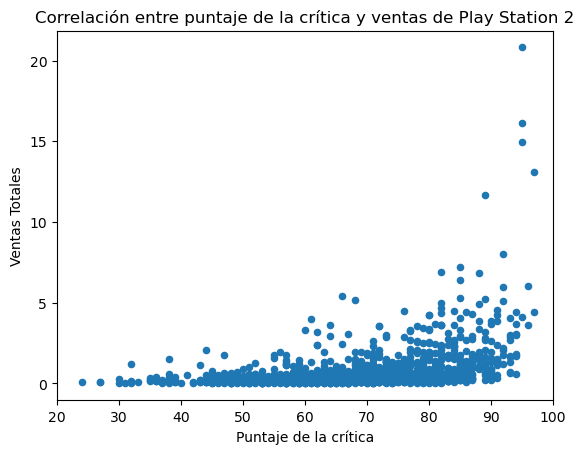

In [31]:
# Diagrama de dispersión para verificar correlación entre reseñas y ventas 
#Plataforma escogida PS2 
platform_filter = filtered_year.query("platform == 'PS2'")
#Creamos Diagrama de dispersión para correlación entre critic_score y total_sales 
platform_filter.plot.scatter(x = 'critic_score', y = 'total_sales'),
plt.title ('Correlación entre puntaje de la crítica y ventas de Play Station 2'),
plt.xlabel('Puntaje de la crítica'),
plt.ylabel('Ventas Totales'),
#Definimos el límite en eje x entre 20 y 10 para obtener la visualización correcta 
plt.xlim(20,100)
plt.show()


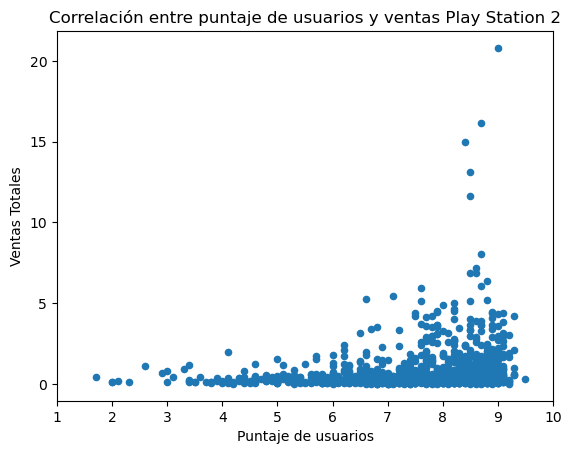

In [32]:
#Creamos Diagrama de dispersión para correlación entre user_score y total_sales 
platform_filter.plot.scatter(x = 'user_score', y = 'total_sales'),
plt.title ('Correlación entre puntaje de usuarios y ventas Play Station 2'),
plt.xlabel('Puntaje de usuarios'),
plt.ylabel('Ventas Totales'),
#Definimos el límite en eje x entre 20 y 10 para obtener la visualización correcta 
plt.xlim(1,10)
plt.show()


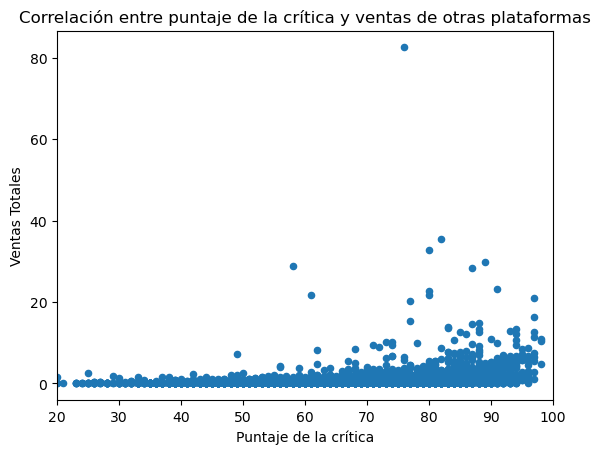

In [33]:
#Comparar los resultados con la plataforma designada arriba y otras plataformas. 
#Se comparan resultados con las demás plataformas 
platform_filter2 = filtered_year.query("platform != 'PS2'")
#Creamos Diagrama de dispersión para correlación entre critic_score y total_sales 
platform_filter2.plot.scatter(x = 'critic_score', y = 'total_sales'),
plt.title ('Correlación entre puntaje de la crítica y ventas de otras plataformas'),
plt.xlabel('Puntaje de la crítica'),
plt.ylabel('Ventas Totales')
plt.xlim(20,100)
plt.show()

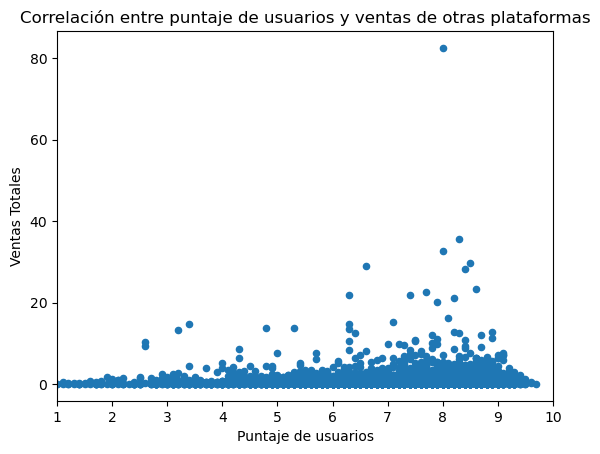

In [34]:
#Creamos Diagrama de dispersión para correlación entre user_score y total_sales 
platform_filter2.plot.scatter(x = 'user_score', y = 'total_sales'),
plt.title ('Correlación entre puntaje de usuarios y ventas de otras plataformas'),
plt.xlabel('Puntaje de usuarios'),
#Definimos el límite en eje x entre 20 y 10 para obtener la visualización correcta 
plt.ylabel('Ventas Totales')
plt.xlim(1,10)
plt.show()

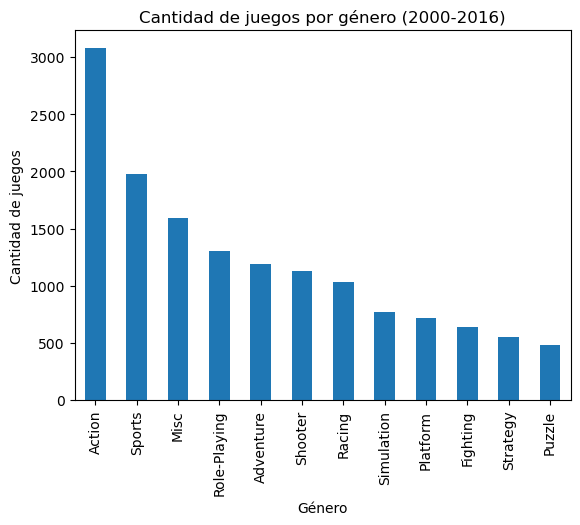

genre
Action          3079
Sports          1979
Misc            1597
Role-Playing    1300
Adventure       1194
Name: total_sales, dtype: int64

In [35]:
#Hallar la distribución  general de los juegos por género y ventas. 
genre_games = filtered_year.groupby('genre')['total_sales'].count().sort_values(ascending=False)
#Generamos gráfica 
genre_games.plot(x='genre', y='total_sales', kind='bar', ),
plt.title ('Cantidad de juegos por género (2000-2016)'),
plt.xlabel('Género'),
plt.ylabel('Cantidad de juegos')
plt.show()
genre_games.head()

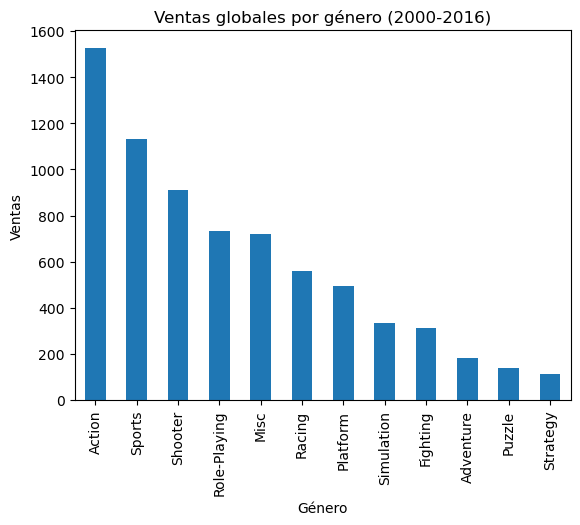

In [36]:
#Hallar la distribución  general de los juegos por género y ventas. 
genre_sales = filtered_year.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
#Generamos gráfica 
genre_sales.plot(x='genre', y='total_sales', kind='bar'),
plt.title ('Ventas globales por género (2000-2016)'),
plt.xlabel('Género'),
plt.ylabel('Ventas')
plt.show()


#### 6.1 Hallazgos.

Para este caso se tomaron los datos a partir del año 2000, ya que como se vió anteriormente es cuando tenemos ventas significativas
Primero observamos que hay diferencias significativas en las ventas, sindo la consola PS2 la que más ventas posee, con un agran ventaja sobre la competidora x360, 
la cual junto a PS3, Wii y DS tiene realtivamente poca ventaja, a partir de este punto las demás consolas decaen mucho en ventas. 
Sin embargo, en el promedio de las ventas ocurre algo interesante ya que al lider de ventas es la cosal DS, esto se debe a que como observamos anteriormente, al  estar tanto tiempo en el mercado tuvo picos muy  altos, 
ya que la media es susceptible a valores extremos esto nos indica que consolas como GB o X360 de Nintendo y Microsoft respectivamente tienen picos altos de ventas pero poca estabilidad a diferencia de la Play Station 2 la cual es posible que se halla mantenido en el mercado tantos años gracias a esa estabilidad de ventas. 
Ya en el boxplot observmos como las ventas totales de PS2 superan en gran medida a las demás plataformas concluyendo que existe una diferencia significativa. 
Se selcciono esta plataforma para hacer el análisis por ser la que tiene más datos de ventas, primeramente observamos una ligera correlación positiva entre el puntaje de la crítica y las ventas, observamos que esta curva se incrementa entre el puntaje 90 y 100 donde las ventas se disparan. 
Lo mismo ocurre con el puntaje de los usuarios donde las ventas se disparan entre el número 8 y 9. 
En las demás plataformas el fenómeno es menos marcado si bien hay una correlación positiva esta es mucho mernor. 
Por lo que podemso decir que salvo aquellos títulos con puntaje excelente 9-10 el puntaje no es un valor signifcativo en las ventas, aunque si es un factor que influye. 
En el caso de los géneros se halló que exsiten géneros más rentables que otros, en este caso generos con más juegos disponibles son los de acción,  seguidos de deportes y otrs (Misc). 
En el caso de las ventas observamos que los videojuegos tipo shooter tienen más ventas a pesar de contar con menos títulos por lo que podriamos menciaonar que los juegos más rentables son: 

-Acción 
-Sport
-Shooter

Podríamos concluir que esto se debe a que se trata de juego más generales ya que los juegos de tipo estrategia que son los de más baja sventas estarían reservados a un tipo de mercado muy específico.

### 7. Creación de perfil de usuario  por región

Para esta sección tomremos las cinco plataformas principales para describir las variaciones en sus cuotas de mercado de una región a otra, la cual se calcula  dividiendo las ventas totales de un producto o industria particular entre las ventas de una empresa durante el mismo período de tiempo.
Una vez realizado lo anterior, se pretrende hallar los cinco géneros principales y las diferencias que existen en cada región.
Finalmente se determinará si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
Para este caso, las regiones designadas son Norteamérica, Unión Europea y Japón.


In [37]:
#Determinamos las ventas totales y por región para cada plataforma. 
platform_sales3 = filtered_year.groupby('platform')[['na_sales','eu_sales','jp_sales','total_sales']].sum()
platform_sales3 = platform_sales3.sort_values(ascending=False, by='total_sales')
#Creamos un nuevo df 
df = platform_sales3.head()
df.reset_index(inplace=True)
print(df)
df.info()





  platform  na_sales  eu_sales  jp_sales  total_sales
0      PS2    572.92    332.63    137.54      1233.56
1     X360    595.74    268.32     12.30       961.24
2      PS3    390.13    327.21     79.41       931.34
3      Wii    486.87    258.32     68.28       891.18
4       DS    380.31    188.41    175.00       802.76
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   platform     5 non-null      object 
 1   na_sales     5 non-null      float64
 2   eu_sales     5 non-null      float64
 3   jp_sales     5 non-null      float64
 4   total_sales  5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 332.0+ bytes


In [38]:
#Creamos una función para generar la cuotas de mercado por región 
def cuota(venta, region):
    total = (region / venta)*100# calcula el total del artículo en el carrito
    return total 

#ventas por region PS2 
ps2total = df.loc[0, 'total_sales']
ps2na = df.loc[0, 'na_sales']
ps2eu = df.loc[0, 'eu_sales']
ps2jp = df.loc[0, 'jp_sales']

#ventas por region X360
x360total = df.loc[1, 'total_sales']
x360na = df.loc[1, 'na_sales']
x360eu = df.loc[1, 'eu_sales']
x360jp = df.loc[1, 'jp_sales']

#ventas por region PS3
ps3total = df.loc[2, 'total_sales']
ps3na = df.loc[2, 'na_sales']
ps3eu = df.loc[2, 'eu_sales']
ps3jp = df.loc[2, 'jp_sales']

#ventas por region WII
wiitotal = df.loc[3, 'total_sales']
wiina = df.loc[3, 'na_sales']
wiieu = df.loc[3, 'eu_sales']
wiijp = df.loc[3, 'jp_sales']

#ventas por region DS
dstotal = df.loc[4, 'total_sales']
dsna = df.loc[4, 'na_sales']
dseu = df.loc[4, 'eu_sales']
dsjp = df.loc[4, 'jp_sales']

#Calculo cuotas ps2 
Cuotaps2na = cuota(ps2total, ps2na )
Cuotaps2eu = cuota(ps2total, ps2eu)
Cuotaps2jp = cuota(ps2total, ps2jp)

#Calculo cuotas x360
Cuotax360na = cuota(x360total, x360na)
Cuotax360eu = cuota(x360total, x360eu)
Cuotax360jp = cuota(x360total, x360jp)

#Calculo cuotas ps3
Cuotaps3na = cuota(ps3total, ps3na )
Cuotaps3eu = cuota(ps3total, ps3eu)
Cuotaps3jp = cuota(ps3total, ps3jp)

#Calculo cuotas wii
Cuotawiina = cuota(wiitotal, wiina )
Cuotawiieu = cuota(wiitotal, wiieu)
Cuotawiijp = cuota(wiitotal, wiijp)

#Calculo cuotas ds
Cuotadsna = cuota(dstotal, dsna )
Cuotadseu = cuota(dstotal, dseu)
Cuotadsjp = cuota(dstotal, dsjp)

#Imprimir resultado
print('Las cuotas de participación por región en porcentajes (%) son:\n',
'\n'
'Para Estados Unidos.\n',
'\n''PS2: ', Cuotaps2na, '\n'
'X360: ',Cuotax360na , '\n'
'PS3: ',Cuotaps3na , '\n'
'WII: ',Cuotawiina , '\n'
'DS: ',Cuotadsna, '\n'
,
'\n'
'Para Europa\n',
'\n''PS2:',Cuotaps2eu ,'\n'
'X360: ',Cuotax360eu ,'\n'
'PS3: ',Cuotaps3eu ,'\n'
'WII: ',Cuotawiieu, '\n'
'DS: ',Cuotadseu,'\n'
'\n'
'Para Japón:\n',
'\n''PS2: ',Cuotaps2jp, '\n'
'X360: ',Cuotax360jp ,'\n'
'PS3: ',Cuotaps3jp ,'\n'
'WII: ',Cuotawiijp , '\n'
'DS: ',Cuotadsjp 

)



Las cuotas de participación por región en porcentajes (%) son:
 
Para Estados Unidos.
 
PS2:  46.44443723856156 
X360:  61.97619741167658 
PS3:  41.88910601928404 
WII:  54.6320608631253 
DS:  47.37530519707011 
 
Para Europa
 
PS2: 26.965044262135606 
X360:  27.91394448836919 
PS3:  35.133248867223564 
WII:  28.98628784308445 
DS:  23.47027754247845 

Para Japón:
 
PS2:  11.149842731606082 
X360:  1.2795971869668346 
PS3:  8.526424291880517 
WII:  7.661751834646199 
DS:  21.799790722009067


In [39]:
#Determinar los 5 géneros principales 
genre_sales_region = filtered_year.groupby('genre')[['na_sales','eu_sales','jp_sales','total_sales']].sum()
genre_sales_region = genre_sales_region.sort_values(ascending=False, by='total_sales')
#Creamos un nuevo df 
df2 = genre_sales_region.head()
df2.reset_index(inplace=True)
print(df2)
df2.info()
#Observar las diferencias por región

          genre  na_sales  eu_sales  jp_sales  total_sales
0        Action    752.27    466.58    132.23      1526.16
1        Sports    589.39    339.58     75.88      1130.92
2       Shooter    495.23    294.02     23.28       912.70
3  Role-Playing    282.30    155.69    241.71       731.22
4          Misc    365.27    196.71     85.43       718.35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genre        5 non-null      object 
 1   na_sales     5 non-null      float64
 2   eu_sales     5 non-null      float64
 3   jp_sales     5 non-null      float64
 4   total_sales  5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 332.0+ bytes


In [40]:
df2

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,752.27,466.58,132.23,1526.16
1,Sports,589.39,339.58,75.88,1130.92
2,Shooter,495.23,294.02,23.28,912.70
3,Role-Playing,282.30,155.69,241.71,731.22
4,Misc,365.27,196.71,85.43,718.35


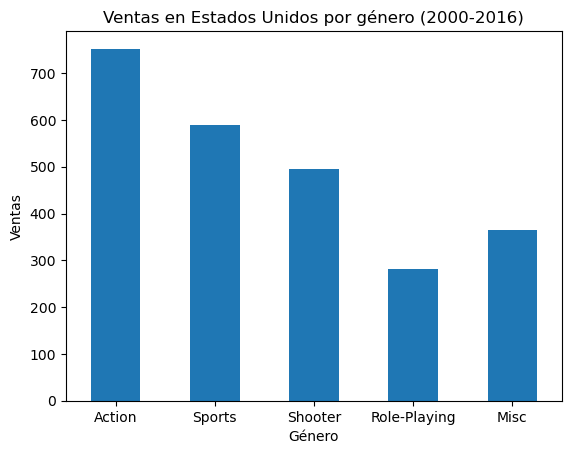

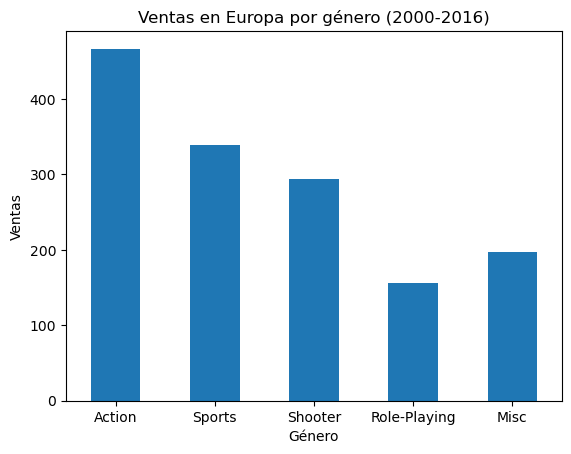

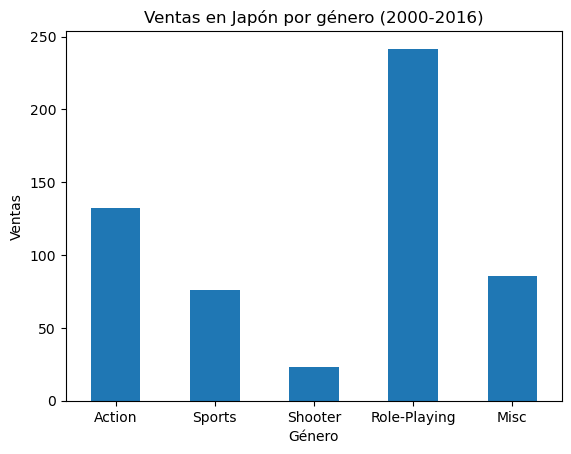

In [41]:
#Generamos gráficas por región para facilitar la visualización
df2.plot(x='genre', y='na_sales', kind='bar', rot=0, legend=False),
plt.title ('Ventas en Estados Unidos por género (2000-2016)'),
plt.xlabel('Género'),
plt.ylabel('Ventas')
plt.show()

df2.plot(x='genre', y='eu_sales', kind='bar', rot=0, legend=False),
plt.title ('Ventas en Europa por género (2000-2016)'),
plt.xlabel('Género'),
plt.ylabel('Ventas')
plt.show()

df2.plot(x='genre', y='jp_sales', kind='bar', rot=0, legend=False),
plt.title ('Ventas en Japón por género (2000-2016)'),
plt.xlabel('Género'),
plt.ylabel('Ventas')
plt.show()

In [42]:
#Calcular ventas por región según clasificación ESRB 
esrb_sales_region = filtered_year.groupby('rating')[['na_sales','eu_sales','jp_sales','total_sales']].sum()
esrb_sales_region = esrb_sales_region.sort_values(ascending=False, by='total_sales')
df3 = esrb_sales_region
df3.reset_index(inplace=True)
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       7 non-null      object 
 1   na_sales     7 non-null      float64
 2   eu_sales     7 non-null      float64
 3   jp_sales     7 non-null      float64
 4   total_sales  7 non-null      float64
dtypes: float64(4), object(1)
memory usage: 412.0+ bytes


In [43]:
df3

,rating,na_sales,eu_sales,jp_sales,total_sales
0,E,1249.26,690.61,189.91,2359.16
1,M,727.80,472.40,57.84,1432.35
2,T,709.86,392.71,131.01,1381.78
3,RP,494.40,345.84,396.86,1341.20
4,E10+,345.50,183.33,40.20,640.95
5,AO,1.26,0.61,0.00,1.96
6,EC,1.53,0.11,0.00,1.75


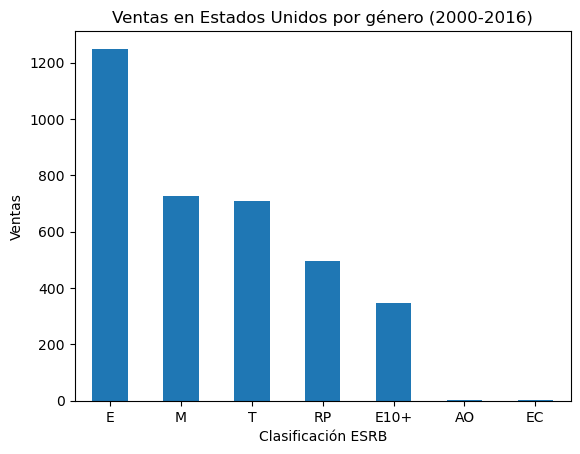

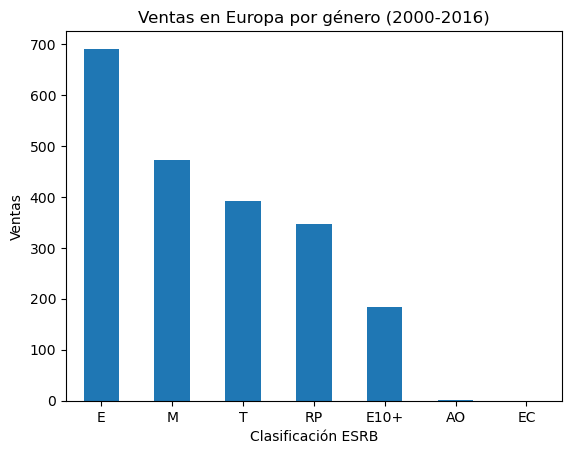

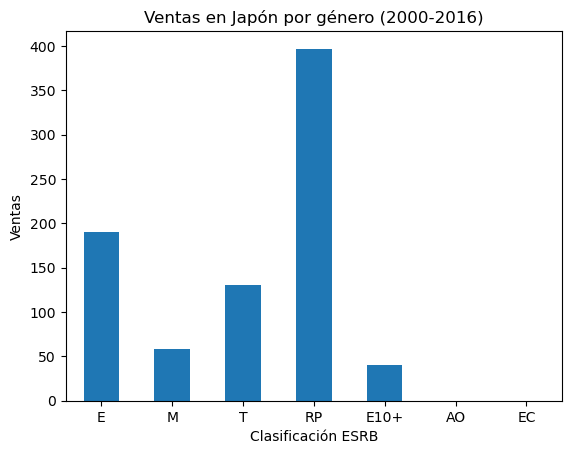

In [44]:
#Generamos gráficas por región para facilitar la visualización
df3.plot(x='rating', y='na_sales', kind='bar', rot=0, legend=False),
plt.title ('Ventas en Estados Unidos por género (2000-2016)'),
plt.xlabel('Clasificación ESRB'),
plt.ylabel('Ventas')
plt.show()

df3.plot(x='rating', y='eu_sales', kind='bar', rot=0, legend=False),
plt.title ('Ventas en Europa por género (2000-2016)'),
plt.xlabel('Clasificación ESRB'),
plt.ylabel('Ventas')
plt.show()

df3.plot(x='rating', y='jp_sales', kind='bar', rot=0, legend=False),
plt.title ('Ventas en Japón por género (2000-2016)'),
plt.xlabel('Clasificación ESRB'),
plt.ylabel('Ventas')
plt.show()

#### 7.1 Hallazgos. 

Observamos que para las plataformas la cuota de mercado es de entre 10% y 50%  variando mucho entre regiones, indicando que hay plataformas que tienen más participación en ciertos mercados. 
También vemos que de acuerdo a cada región varían géneros más vendidos. 
La clasificación ESRB, afecta las regiones. 

Por ende los perfiles para cada región quedan de la siguiente manera: 


 - Norteamérica.

 Plataforma preferida: Xbox 360 

 Cuota de mercado de dicha plataforma: 61.9%

 Género preferido: Acción

 Clasificación ESRB más vendida: E (Everyone, sin restricción de edad) 


 - Europa.

 Plataforma preferida: Play Station 3 

 Cuota de mercado de dicha plataforma: 35%

 Género preferido: Acción

 Clasificación ESRB más vendida: E (Everyone, sin restricción de edad)


 - Japón.

 Plataforma preferida: Nintendo DS

 Cuota de mercado de dicha plataforma: 21.7%

 Género preferido: Role-Playing

 Clasificación ESRB más vendida: RP (Rated Pending, sin clasificación  por edad oficial) 
 


### 8. Hipótesis
En este apartado se elaborarám hipótesis nulas y alternativas para dar respuesta a las siguientes interrogantes que son de utilidad al negocio. 

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. Para esto se elaboraron las siguientes hipótesis: 

Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Para esto se elaboraron las siguientes hipótesis: 

Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [45]:
#Obtenemos calificaciones promedio de los usuarios para las plataformas Xbox One y PC
xbox_scores= filtered_year[filtered_year['platform'] == 'XOne']['user_score']
average_xbox_scores= xbox_scores[xbox_scores != '0.0']
pc_scores= filtered_year[filtered_year['platform'] == 'PC']['user_score']
average_pc_scores= pc_scores[pc_scores != '0.0']
# Prueba de hipótesis
#Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales 
#Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

#Establecemos el valor de umbral alfa 
alpha = 0.05
#Verificamos las varianzas mediante la prueba levene 
result1 = st.levene(average_xbox_scores,average_pc_scores, center='mean')
print('valor p:', result1.pvalue)
if result1.pvalue < alpha:
    print("Se rechaza la hipótesis nula, las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula, las varianzas son iguales")
#Una vez verificadas las varianzas aplicamos la prueba t.student, se seleciona var=True ya que la prueba levene indica igauldad de varianzas    
result2 = st.ttest_ind(average_xbox_scores,average_pc_scores,equal_var=True)
print('valor p:', result2.pvalue)
#Probamos la primer hipótesis 
if result2.pvalue < alpha:
    print("Se rechaza la hipótesis nula, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes")
else:
    print("No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales") 




valor p: 0.39194509117249754
No podemos rechazar la hipótesis nula, las varianzas son iguales
valor p: 0.00023786088892256146
Se rechaza la hipótesis nula, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes


In [46]:
#Obtenemos calificaciones promedio de los usuarios para los géneros de Acción y Deportes
action_scores= filtered_year[filtered_year['genre'] == 'Action']['user_score']
average_action_scores= action_scores[action_scores != '0.0']
sport_scores= filtered_year[filtered_year['genre'] == 'Sports']['user_score']
average_sport_scores= pc_scores[pc_scores != '0.0']

# Prueba de hipótesis
#Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales 
#Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

#Establecemos el valor de umbral alfa 
alpha = 0.05

#Verificamos las varianzas mediante la prueba levene 
result1 = st.levene(average_action_scores,average_sport_scores, center='mean')
print('valor p:', result1.pvalue)
if result1.pvalue < alpha:
    print("Se rechaza la hipótesis nula, las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula, las varianzas son iguales")
#Una vez verificadas las varianzas aplicamos la prueba t.student    
result2 = st.ttest_ind(average_action_scores,average_sport_scores,equal_var=False)
print('valor p:', result2.pvalue)
#Probamos la primer hipótesis 
if result2.pvalue < alpha:
    print("Se rechaza la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes")
else:
    print("No podemos rechazar la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales")  

#Probamos la primer hipótesis 

valor p: 3.537443614703929e-75
Se rechaza la hipótesis nula, las varianzas son diferentes
valor p: 1.8661297901254597e-35
Se rechaza la hipótesis nula, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes


#### 8.1 Hallazgos

La hipótesis nula y alternativa fue formulada a partir del supuesto que existe una diferencia entre los promedios de critica de usuarios entre las plataformas PC y Xbox One y los generos acción y deportes. 
Cabe resaltar que se aplicó un filtro extra donde se quitaban los valores cero, los cuales podrían afectar los resultados del análsis recordando que nos refríamos a juegos que no contabna aún con una crítica. 
Para este caso tomamos un valor alpha de 0.05 que se compara con los resultados de la prueba estadística.  
En este caso, primero realizamos una prueba Levene, la cual nos permite comparar las varianzas de ambas series para determianr si son o no iguales y esto nos permita más adelante establecer los parámetros correctos en los siguientes pasos. 
Para estos se formulan dos hipótesis una nula y otra alternativa siendo las siguientes: 

Hipótesis nula: Las varianzas son iguales.

Hipótesis alternativa:las varianzas son diferentes. 

Para el primer caso obtuvimos que las varianzas de la comparación entre Xbox y PC eran iguales por lo que se estableció el parámetro equalvar= True. 

Para el segundo caso obtuvimos que las varianzas de la comparación entre Acción y Deportes eran diferentes por lo que se estableció el parámetro equalvar= False.

Se establecieron las siguientes hipótesis:

Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales. 

Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son igualeS.

Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para obtener dicho resultado se realizó una prueba t.Student la cual nos permite comparar las medias de dos poblaciones distribuidas en forma normal son iguales.

De acuerdo a los resultados obtuvimos que se recahza la primer hipotesis nula y se recahza la segunda hipotesis nula, lo que indica que: 

a. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

b. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Conclusiones 

En este proyecto, se obtuvieron datos significativos para la empresa, la cual nos permite halar datos que nos ayuden a generar mejores decisiones de negocio.
Primero se debió limpiar nuestro set de datos de valores ausentes y de errores en el mismo, mediante la librería pandas y numpy que nos ayudaron a gestionar de forma más eficiente estos datos. 
Una vez terminada la primera limpieza de datos, se procedió a cambiar los nombres de las columnas y pasar los valores a un tipo de datos que nos permitiera trabajar mejor y se agregó una columna con el total de ventas para facilitar futuros análisis. 
Posteriormente se realizó un análisis de consolas donde se halló que históricamente la más popular es la Play Station 2, y en general las plataformas de Sony, seguidas de las de Microsoft y Nintendo. 
Estas plataformas al menos en el caso de Sony y Microsoft tienen un ciclo de vida de entre 6 y 10 años, siendo que se reemplazan 3 años después del pico de ventas más alto, siendo que una sugerencia de estrategia comercial sería bajar inventarios una vez se detecten los próximos ciclos de venta y prepararse para los picos de venta de las siguientes plataformas ya que las siguientes son Play Station 4, Xbox One y Wii U que si bien este año tiene pocas ventas, están reemplazando las antiguas plataformas por lo que se puede asumir un repunte en las ventas en los próximos tres años al estar de salida sus antecesoras. 
Igualmente vemos que Sony es la plataforma más popular a nivel mundial con diferencias significativas en las ventas por lo que las promociones para estas consolas deberían ser más enfocadas en el mercado global, regionalmente hubo más hallazgo los cuales se darán más adelante. 
Al hallar una correlación entre el puntaje de la crítica, puntaje de usuarios y ventas observamos que estos si bien generan una correlación no es un factor tan significativo en los juegos con puntaje promedio, caso contrario para valores extremos como aquellos con muy malas reseñas y aquellos con reseñas muy buenas, por lo que hay que estar atentos a las criticas pues si un juego tiene criticas positivas elevadas, seguramente será un éxito de ventas caso contrario si las críticas son negativas generará pocas ventas, y si las críticas son mixtas o neutrales no es un factor que influya. 
Posteriormente se procedió a generar perfiles por región pues tanto Norteamérica, Europa y Japón tienen consumos distintos al ser culturas distintas. 
Obtuvimos los siguientes resultados: 
Perfil de usuario de Norteamérica.

 Plataforma preferida: Xbox 360 

 Cuota de mercado de dicha plataforma: 61.9%

 Género preferido: Acción

 Clasificación ESRB más vendida: E (Everyone, sin restricción de edad) 

Aquí observamos que la plataforma preferida es la Xbox 360 de Microsoft la cual es esperado al ser la plataforma de origen americano. 

 - Europa.

 Plataforma preferida: Play Station 3 

 Cuota de mercado de dicha plataforma: 35%

 Género preferido: Acción

 Clasificación ESRB más vendida: E (Everyone, sin restricción de edad)

Aquí observamos que la plataforma preferida es la Play Station 3, siendo que en este punto a nivel mundial la preferida seguía siendo Play Station 2 lo cual nos indicaría que el mercado europeo tiende  a buscar lo más nuevo en consolas independientemente de la tendencia global, salvo este punto el patrón de consumo es similar al de Norteamérica. 


 - Japón.

 Plataforma preferida: Nintendo DS

 Cuota de mercado de dicha plataforma: 21.7%

 Género preferido: Role-Playing

 Clasificación ESRB más vendida: RP (Rated Pending, sin clasificación por edad oficial)

Para el caso de Japón mostró comportamientos radicalmente diferentes, no solo por preferir Nintendo, lo cual no encaja con la tendencia global, aunque es de esperarse pues la desarrolladora es de origen japonés, sino que también tienden a consumir más juegos de rol que en otras partes del mundo. 
Estos hallazgos pues, nos permiten generar campañas personalizadas según el perfil de cliente de cada región. 
Finalmente, probamos dos hipótesis las cuales nos indicaban si para el caso de Xbox ONE la nueva consola de Microsoft, y las PC, teníamos críticas de usuario similares lo que implicaría trato igual en cuanto a campañas   y ventas para ambos usuarios, sin embargo, se observó que no es el caso, por lo que vemos que los usuarios de ambas plataformas tienen un perfil distinto.
Ocurre lo mismo con los dos géneros más populares (Acción y deportes), donde difieren las críticas por lo que igualmente los usuarios cuentan con un perfil distinto. 
En este proyecto se observaron diferentes casos que ayudan al negocio a generar estrategias de venta y comercialización, así como para poder enfocar esfuerzos de acuerdo a los perfiles de cada usuario, si bien aquí se da respuesta a varias interrogantes se propone continuar investigando más variables las cuales seguramente surgen con la implementación de las estrategias aquí descritas. 
Igualmente el análisis de datos es un proceso continuo y de mejora constante que permite generar cada vez estrategias más eficientes y optimizar la toma de decisiones.  
